## Baseline checks

Just checking everything works as it should

In [12]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

centralized_training_loss = "../results/centralized_training/loss_per_epoch.csv"

### The model we have is actually learning 

Text(0.5, 1.0, 'Centralized Training Loss')

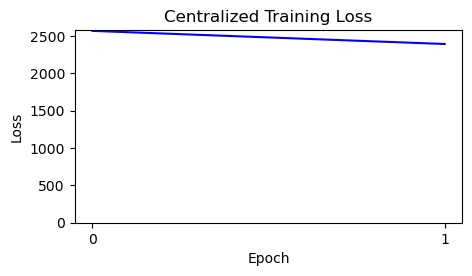

In [13]:
# read in the csv file
df_centralized_training_loss = pd.read_csv(centralized_training_loss)
#plot the training loss
plt.figure(figsize=(5, 2.5))
plt.plot(df_centralized_training_loss['epoch'], df_centralized_training_loss['loss'], label='Centralized Training Loss', color='blue')
plt.ylim(bottom=0)
# x axis is discrete
plt.xticks(df_centralized_training_loss['epoch'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Centralized Training Loss')


In [14]:
# Test set accuracy
centralized_test_accuracy = "../bin/baseline-pytorch/outputs/centralized_outputs/test_loss_accuracy.csv"
# read in the csv file
df_centralized_test_accuracy = pd.read_csv(centralized_test_accuracy)
df_centralized_test_accuracy

,loss,accuracy
0,0.773475,0.714101


In [ ]:
# Now load the federated learning loss
import json
federated_training_loss = "../bin/baseline-pytorch/outputs/federated_outputs/results.json"
with open(federated_training_loss, 'r') as f:
    data = json.load(f)

# Plot centralized evaluate
df_centralized_evaluate = pd.DataFrame(data['centralized_evaluate'])
df_federated_evaluate = pd.DataFrame(data['federated_evaluate'])


In [7]:
df_centralized_evaluate


,round,centralized_loss,centralized_accuracy
0,0,2.306210,0.1469
1,1,1.968226,0.2489


In [8]:
df_centralized_training_loss

,epoch,loss
0,0,2.177988
1,1,1.512875
2,2,0.962288
3,3,1.173444
4,4,0.552095


## Visualize created dataset

In [2]:
import torch
# read in the periodic dataset file 
test_dataset_filename = "../data/periodic/periodic_test.pt"
train_dataset_filename = "../data/periodic/periodic_train.pt"
time_steps_filename = "../data/periodic/periodic_time_steps.pt"
# read in the time steps
time_steps = torch.load(time_steps_filename, weights_only=True)
# read in the pt file
test_dataset = torch.load(test_dataset_filename, weights_only=True)
train_dataset = torch.load(train_dataset_filename,  weights_only=True)


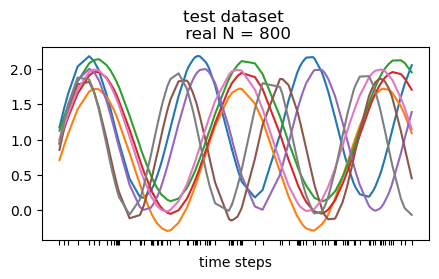

In [5]:
# extract the first 2 from the test dataset
# get total number of time steps
n_samples = train_dataset.shape[0]
n_plot = 8
train_dataset_plot = train_dataset[0:n_plot]
train_dataset_plot.shape
# plot time steps on x and the test dataset on y
plt.figure(figsize=(5, 2.5))
for i in range(n_plot):
    plt.plot(time_steps, train_dataset_plot[i], label='Training Dataset {}'.format(i))
# draw a grey vertical line at each time step
# for t in time_steps:
#     plt.axvline(x=t, color='gray', linewidth=0.3)
#     # draw x tick marks at each time step inside the plot
plt.xticks(time_steps, rotation=45)
# remove labels on x axis
plt.xticks(ticks=time_steps, labels=['']*len(time_steps))


# draw tick marks on x axis only where there is a time step
plt.xlabel('time steps')
plt.title('test dataset \n real N = {}'.format(n_samples))
# put the legend outside the plot
plt.show()

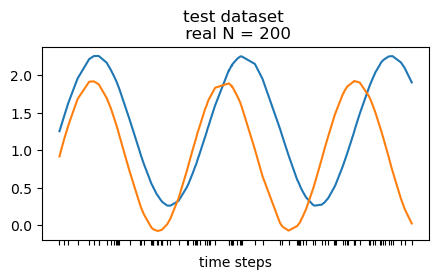

In [8]:
# extract the first 2 from the test dataset
n_plot = 2
test_dataset_plot = test_dataset[0:n_plot]
test_dataset_plot.shape
n_samples = test_dataset.shape[0]
# plot time steps on x and the test dataset on y
plt.figure(figsize=(5, 2.5))
for i in range(n_plot):
    plt.plot(time_steps, test_dataset_plot[i], label='Test Dataset {}'.format(i))
# draw a grey vertical line at each time step
# for t in time_steps:
#     plt.axvline(x=t, color='gray', linewidth=0.3)
#     # draw x tick marks at each time step inside the plot
plt.xticks(time_steps, rotation=45)
# remove labels on x axis
plt.xticks(ticks=time_steps, labels=['']*len(time_steps))
plt.xlabel('time steps')
plt.title('test dataset \n real N = {}'.format(n_samples))
# put the legend outside the plot
plt.show()
